# Decision Trees

## Background reading:

*Intro to Statistical Learning*: 8.1 The Basics of Decision Trees, 8.1.2 Classification Trees

*Ethical Algorithm*: Chapter 1, Algorithmic Privacy, A Bad Solution, (pp. 26-31)

*Ethical Algorithm*: Chapter 4, Lost in the Garden, Led Astray by data, (pp. 137-143)

## Dataset:
The tutorial uses the PA State Police Opioid Related Overdose Dataset
https://data.pa.gov/Opioid-Related/Overdose-Information-Network-Data-CY-January-2018-/hbkk-dwy3 

1. Incident ID      
2. Incident Date   
3. Incident County Name 
4. Victim ID 
5. Gender Desc
6. Age Range   
7. Race 
8. Ethnicity Desc 
9. Accidental Exposure 
10. Victim OD Drug ID
11. Susp OD Drug Desc  
12. Naloxone Administered 
13. Dose Count
14. Survive - Yes, No, or Unknown            

In decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making. 

A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels.

**Example:** Decision Tree for the weather forecast

![](./fig/Tree/fig1.png)

Decision trees are commonly used for decison making. A disadvantage of this is that they can have high variance.
Article:
Decision Trees for Decision Making
https://hbr.org/1964/07/decision-trees-for-decision-making 

Article:
https://publichealth.jhu.edu/2020/linking-hospital-and-other-records-can-predict-both-fatal-and-nonfatal-opioid-overdoses-study-suggests 

https://healthitanalytics.com/features/for-opioids-and-substance-abuse-big-data-analytics-is-just-the-beginning 










## Essence of Data
### Related Topics: Pruning a decision, ensembles, weak learning, bagging, out of bag error estimation, random forests

*Book Sections: 8.2 Bagging Random Forests, Boosting, and Bayesian Additive Regression Trees*

**Pruning a decision**

The shortening of branches of the tree. Pruning is the process of reducing the size of the tree by turning some branch nodes into leaf nodes, and removing the leaf nodes under the original branch. Pruning is useful because classification trees may fit the training data well, but may do a poor job of classifying new values

**Weak learning:**

Simple building block models are sometimes referred to as “weak learners” because they have weak predictive ability on their own.

**Ensemble methods:**

Ensemble methods combine several decision tree models to produce better predictive performance than utilizing a single decision tree. Our goal is to reduce the variance of the statistical learning method.

**Types of ensemble methods:**
1. Bagging: 
    - Decision trees have high variance. (Ie. if we split the training data into two parts at random, and fit a decision tree to both halves, the results that we get could be very different).
    - Goal: We want a statistical learning model with low variance (ie.  if we split the training data into two parts at random, and fit a decision tree to both halves, the results that we get will be very similar). Averaging a set of observations reduces variance.
    - Method:
        1. Create several subsets of data from training samples chosen randomly with replacement. 
        2. Each collection of subset data is used to train their own decision trees. As a result, we end up with an ensemble of different models. 
        3. Average of all the predictions from different trees are used which is more robust than a single decision tree.
        
        <div align = 'center'><font size = '10'>$\hat{f}_{avg}(x)=\frac{1}{B}\displaystyle\sum_{b=1}^B\hat{f^b}(x)$</font></div>
        
2. Random Forest:
    - Advantages of using Random Forest technique:
        1. Handles higher dimensionality data very well.
        2. Handles missing values and maintains accuracy for missing data.
    - Disadvantages of using Random Forest technique:
        1. Since final prediction is based on the mean predictions from subset trees, it won’t give precise values for the regression model.

**Out of error estimation:**

Straightforward way to estimate the test error of a bagged model without having to perform cross validation. 



### Example Codes

In [2]:
import pandas as pd
import math
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model
from sklearn import metrics

In [3]:
#Load the Dataset
Outcomedataset = 'PAOverdoseDataset.csv'
df = pd.read_csv(Outcomedataset,usecols = ['Incident Date','Incident ID','Victim ID','Incident County Name','Gender Desc','Age Range','Race','Ethnicity Desc','Accidental Exposure','Victim OD Drug ID','Susp OD Drug Desc','Naloxone Administered','Dose Count','Survive'])

In [4]:
#checking dataset for null values
df.isna().sum()

Incident ID              0
Incident Date            0
Incident County Name     0
Victim ID                0
Gender Desc              0
Age Range                0
Race                     0
Ethnicity Desc           0
Accidental Exposure      0
Victim OD Drug ID        0
Susp OD Drug Desc        0
Naloxone Administered    0
Dose Count               0
Survive                  0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32822 entries, 0 to 32821
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Incident ID            32822 non-null  int64 
 1   Incident Date          32822 non-null  object
 2   Incident County Name   32822 non-null  object
 3   Victim ID              32822 non-null  int64 
 4   Gender Desc            32822 non-null  object
 5   Age Range              32822 non-null  object
 6   Race                   32822 non-null  object
 7   Ethnicity Desc         32822 non-null  object
 8   Accidental Exposure    32822 non-null  object
 9   Victim OD Drug ID      32822 non-null  int64 
 10  Susp OD Drug Desc      32822 non-null  object
 11  Naloxone Administered  32822 non-null  object
 12  Dose Count             32822 non-null  int64 
 13  Survive                32822 non-null  object
dtypes: int64(4), object(10)
memory usage: 3.5+ MB


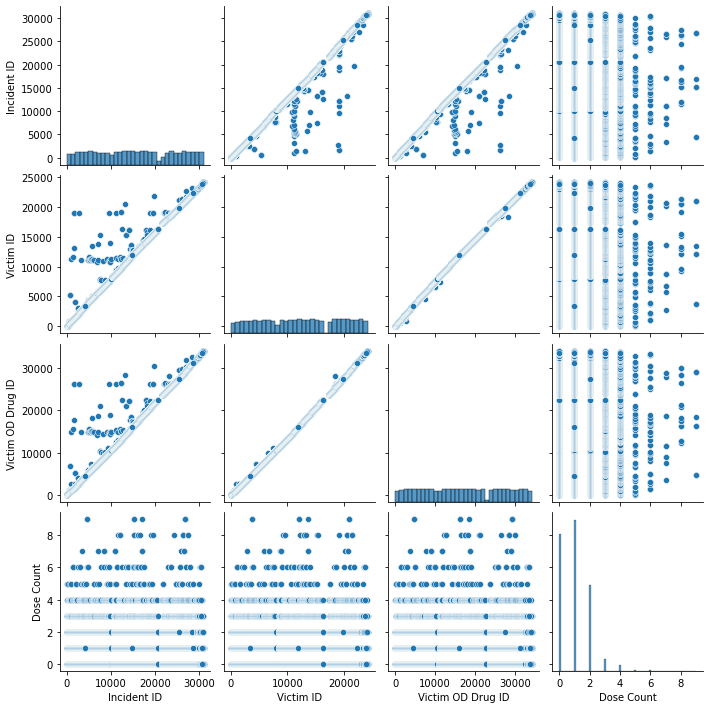

In [5]:
df.info()
sns.pairplot(df)

In [6]:
#show dataset head
df.head()

,Incident ID,Incident Date,Incident County Name,Victim ID,Gender Desc,Age Range,Race,Ethnicity Desc,Accidental Exposure,Victim OD Drug ID,Susp OD Drug Desc,Naloxone Administered,Dose Count,Survive
0,1,1/4/2018,Delaware,1,Male,50 - 59,White,Not Hispanic,N,1,COCAINE/CRACK,Y,1,N
1,1,1/4/2018,Delaware,1,Male,50 - 59,White,Not Hispanic,N,1,COCAINE/CRACK,Y,1,N
2,1,1/4/2018,Delaware,1,Male,50 - 59,White,Not Hispanic,N,2,HEROIN,Y,1,N
3,1,1/4/2018,Delaware,1,Male,50 - 59,White,Not Hispanic,N,2,HEROIN,Y,1,N
4,26,1/26/2018,Chester,5,Male,25 - 29,White,Not Hispanic,N,8,HEROIN,N,0,N


In [7]:
#get rid of the space between words for Victim ID and Incident ID
df=df.rename(columns={'Victim ID': 'VictimID', 'Incident ID': 'IncidentID'})

#describe the number of unique incidents
num_incidents = len(df.IncidentID.unique())
num_people = len(df.VictimID.unique())
print('There are {} unique incidents and {} unique people in this data set'.format(num_incidents, num_people))

There are 21875 unique incidents and 22338 unique people in this data set


In [8]:
#drop incidents with unknown survival outcomes
df = df[df.Survive != 'U']

In [9]:
#encode the columns that include text as numerical categories
from sklearn.preprocessing import LabelEncoder

#create an instance of label encoder
labelencoder = LabelEncoder()

#assign a categorical numerical value to the columns that include text

df["IncidentCountyName_N"] = labelencoder.fit_transform(df["Incident County Name"])
df["Gender_N"] = labelencoder.fit_transform(df["Gender Desc"])
df["AgeRange_N"] = labelencoder.fit_transform(df["Age Range"])
df["Race_N"] = labelencoder.fit_transform(df["Race"])
df["EthnicityDesc_N"] = labelencoder.fit_transform(df["Ethnicity Desc"])
df["Race_N"] = labelencoder.fit_transform(df["Race"])
df["AccidentalExposure_N"] = labelencoder.fit_transform(df["Accidental Exposure"])
df["NaloxoneAdministered_N"] = labelencoder.fit_transform(df["Naloxone Administered"])
df["SuspODDrugDesc_N"] = labelencoder.fit_transform(df["Susp OD Drug Desc"])


#display df to make sure it worked
df

,IncidentID,Incident Date,Incident County Name,VictimID,Gender Desc,Age Range,Race,Ethnicity Desc,Accidental Exposure,Victim OD Drug ID,...,Dose Count,Survive,IncidentCountyName_N,Gender_N,AgeRange_N,Race_N,EthnicityDesc_N,AccidentalExposure_N,NaloxoneAdministered_N,SuspODDrugDesc_N
0,1,1/4/2018,Delaware,1,Male,50 - 59,White,Not Hispanic,N,1,...,1,N,22,1,7,4,2,0,1,6
1,1,1/4/2018,Delaware,1,Male,50 - 59,White,Not Hispanic,N,1,...,1,N,22,1,7,4,2,0,1,6
2,1,1/4/2018,Delaware,1,Male,50 - 59,White,Not Hispanic,N,2,...,1,N,22,1,7,4,2,0,1,9
3,1,1/4/2018,Delaware,1,Male,50 - 59,White,Not Hispanic,N,2,...,1,N,22,1,7,4,2,0,1,9
4,26,1/26/2018,Chester,5,Male,25 - 29,White,Not Hispanic,N,8,...,0,N,14,1,4,4,2,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32817,30665,2/23/2022,Westmoreland,23908,Female,60 - 69,White,Not Hispanic,N,33691,...,1,Y,64,0,8,4,2,0,1,7
32818,30618,2/19/2022,Bucks,23862,Male,30 - 39,White,Not Hispanic,N,33619,...,0,N,8,1,5,4,2,0,0,9
32819,30902,8/1/2021,Clearfield,24104,Male,25 - 29,White,Not Hispanic,N,34002,...,0,N,16,1,4,4,2,0,0,12
32820,30776,3/2/2022,Luzerne,24001,Male,50 - 59,White,Not Hispanic,N,33840,...,2,Y,39,1,7,4,2,0,1,9


In [10]:
#Decide which columns are features and choose the column we want to predict
feature_cols = ['IncidentCountyName_N', 'Gender_N','AgeRange_N','Race_N','EthnicityDesc_N','AccidentalExposure_N','SuspODDrugDesc_N','NaloxoneAdministered_N','Dose Count']
predictors = df[feature_cols]
target = df.Survive

In [11]:
#sort train and test data
x_train, x_test, y_train, y_test =  train_test_split(predictors,target,test_size = 0.2)

In [12]:
#train decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)


In [13]:
#check accuracy and ROC score of the model
accuracy = metrics.accuracy_score(y_test,predictions)*100
print('Accuracy of the Decision Tree Classification Model: {0}%'.format(accuracy))

Accuracy of the Decision Tree Classification Model: 79.738245273873%


In [14]:
# create a matrix with classification predictions
confusion_matrix = metrics.confusion_matrix(y_test,predictions)
confusion_matrix


array([[ 635,  649],
       [ 605, 4300]], dtype=int64)

Text(0.5, 257.44, 'Predicted Class')

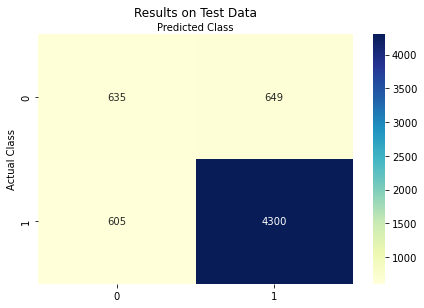

In [15]:
#heat map of accuracy
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [16]:
#use a gridsearch for hyperparameters to prune the tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
depth = model.get_depth()
params = {'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, depth],
         'criterion':  ['gini', 'entropy'],
         'splitter': ['best', 'random']}
clf = DecisionTreeClassifier()
gscv = GridSearchCV(estimator = clf, param_grid = params)
gscv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                       22, 24, 26, 28, 30, 30],
                         'splitter': ['best', 'random']})

In [17]:
#select best model
model_best = gscv.best_estimator_
model_best.fit(x_train, y_train)
y_train_pred = model_best.predict(x_train)
y_test_pred = model_best.predict(x_test)
#find accuracy of best model
accuracy = metrics.accuracy_score(y_test,y_test_pred)*100
print('Accuracy of the Decision Tree Classification Model: {0}%'.format(accuracy))

Accuracy of the Decision Tree Classification Model: 82.355792535143%


In [18]:
# create a matrix with classification predictions
confusion_matrix = metrics.confusion_matrix(y_test,y_test_pred)
confusion_matrix


array([[ 537,  747],
       [ 345, 4560]], dtype=int64)

Text(0.5, 257.44, 'Predicted Class')

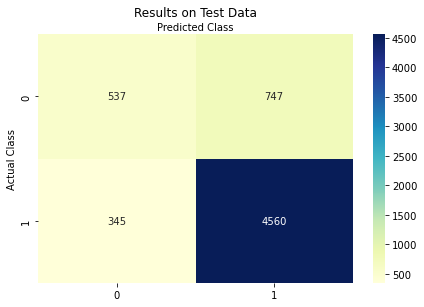

In [19]:
#heat map of accuracy
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [ ]:
#create a plot of the decision tree
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 10))
tree.plot_tree(model_best)
print(tree.export_text(model_best))

|--- feature_7 <= 0.50
|   |--- feature_6 <= 12.50
|   |   |--- feature_2 <= 4.50
|   |   |   |--- feature_6 <= 8.50
|   |   |   |   |--- feature_6 <= 4.50
|   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |--- feature_0 <= 44.50
|   |   |   |   |   |   |   |--- feature_0 <= 15.00
|   |   |   |   |   |   |   |   |--- class: Y
|   |   |   |   |   |   |   |--- feature_0 >  15.00
|   |   |   |   |   |   |   |   |--- class: Y
|   |   |   |   |   |   |--- feature_0 >  44.50
|   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |   |--- class: Y
|   |   |   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |   |   |--- class: N
|   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 4.50
|   |   |   |   |   |   |   |   |--- class: Y
|   |   |   |   |   |   |   |--- feature_0 >  4.50
|   |   |   |   |   |   |   |   |--- class: Y
|   |   |   |   |   |   |--- fe

In [ ]:
#look at just the top of the tree so we can get a better visual
#create a plot of the decision tree
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20, 20))
tree.plot_tree(model_best, max_depth = 3)

In [ ]:
df.head()

In [20]:
# bagging example

from sklearn.datasets import make_classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

Baggingmodel = BaggingClassifier()
Baggingmodel.fit(x_train, y_train)
predictions_bagging = Baggingmodel.predict(x_test)
predictions_bagging

array(['Y', 'N', 'Y', ..., 'Y', 'Y', 'Y'], dtype=object)

In [21]:
accuracy_bagging = metrics.accuracy_score(y_test,predictions_bagging)*100
print('Accuracy of the Bagging Classification Model: {0}%'.format(accuracy_bagging))

Accuracy of the Bagging Classification Model: 81.3216997899499%


In [22]:
confusion_matrix_bagging = metrics.confusion_matrix(y_test,predictions_bagging)
confusion_matrix_bagging

array([[ 602,  682],
       [ 474, 4431]], dtype=int64)

Text(0.5, 257.44, 'Predicted Class')

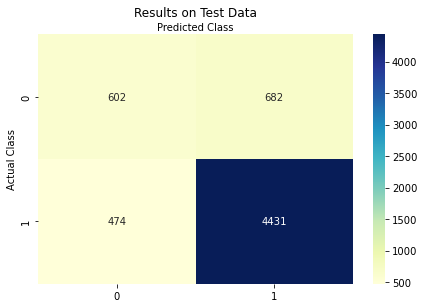

In [24]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix_bagging), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

## AI in fabrics of society
### The privacy problem and k-anonymity
How do we fix the problem of de-anonymization is important for hospital database system to protect privacy. Sometimes the unique records in the database can easily find the personnel information even his or her personnel information such as name or address are not shown in the database.

Notice that in this database, the age is not a number but a range. Why the database does not display the detail age about the records?

Even though the detail personnel information is not shown, we can find a unique record who is 29 years old and is a male. Imagine if you know that your neighborhood called Able is 29 years old and is a male, and you know that he went to this hospital, then you can easily conclude that this guy has a large probability to be Able. With some other information in other datasets, the personnel information can be easily acquired, which is a horrible threat to people's privacy.

Read the ethical book and think about the problem and related solution.

Reading: *Ethical Algorithm*: Chapter 1, Algorithmic Privacy, A Bad Solution, (Page 26-31)